In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_columns", 1000)
from numpy import median
from numpy import mean
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Dataset_final.xlsx')
df.head()

,Unnamed: 0,Готовые,Искатели,Сила искателей,Репосты_вк,Репосты_одн,Возраст,Рост,Мед. Состояние,Фото,Посты,Гендер,Состояние,Цвет волос,Телосложение,Цвет глаз,Одежда_ярк,Одежда_колво,Приметы_колво,Время поиска,Время пропажи,Время нахождения,Координаты пропажи,url_tracks,km,teams,date1,date2,delta_dates,Месяц,Год,Регион,День недели,Сезон,Локация
0,0,0,4,0,0,0,80,170,здоров,присутствует,3,Мужчина,ищется,-,худ,зеленые,Не указано,0,0,1012,21.08.2013,29.05.2016,0.0,0,0,0,0,0,0.0,Август,2013,Белоруссия,Среда,Лето,город
1,1,0,2,0,1,0,14,160,здоров,присутствует,7,Женщина,ищется,русые,-,голубые,Не указано,Не указано,Не указано,5403,15.01.1999,31.10.2013,0.0,0,0,0,0,0,0.0,Январь,1999,Белоруссия,Пятница,Зима,город
2,2,0,0,0,0,0,48,178,здоров,присутствует,1,Er,Не указано,серые,норм,Не указано,Не указано,Не указано,Не указано,0,31.10.2013,31.10.2013,0.0,0,0,0,0,0,0.0,Октябрь,2013,Белоруссия,Четверг,Осень,город
3,3,0,2,0,0,0,69,180,здоров,присутствует,2,Мужчина,мертвый,Не указано,-,серые,Не указано,Не указано,Не указано,23294,21.01.1950,31.10.2013,0.0,0,0,0,0,0,0.0,Январь,1950,Белоруссия,Суббота,Зима,город
4,4,0,5,0,0,0,26,173,здоров,присутствует,6,Мужчина,мертвый,русые,-,зеленые,Не указано,Не указано,Не указано,9698,13.04.1987,31.10.2013,0.0,0,0,0,0,0,0.0,Апрель,1987,Белоруссия,Понедельник,Весна,город


## Блок 1

In [3]:
df = df[df['Год'] > 2010]
df = df[df['Год'] < 2019]
df = df[df["Время поиска"] < 90]
df = df[df["Время поиска"] > 0]
df = df[df["Одежда_колво"] != 'Не указано']
df = df[df["Приметы_колво"] != 'Не указано']
df = df[df["Состояние"] != 'Не указано']
df = df.rename(columns={'Состояние': 'Исход поиска', 'Репосты_вк': 'Репосты в вк (среднее)','Репосты_одн': 'Репосты в одн (среднее)'})

In [4]:
df = df[df["Одежда_колво"] > 0]

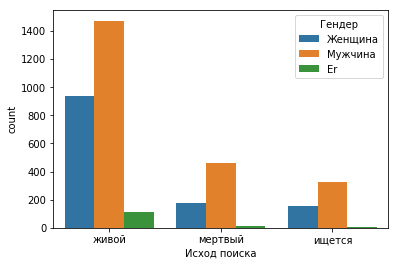

In [5]:
sns.countplot(x = 'Исход поиска', hue = 'Гендер', data = df)

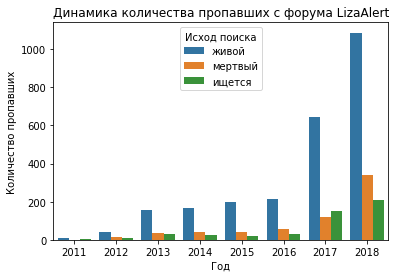

In [6]:
sns.countplot(x = 'Год', hue ='Исход поиска', data = df)
plt.ylabel("Количество пропавших")
plt.title('Динамика количества пропавших с форума LizaAlert')
plt.savefig('block1_losted.png')

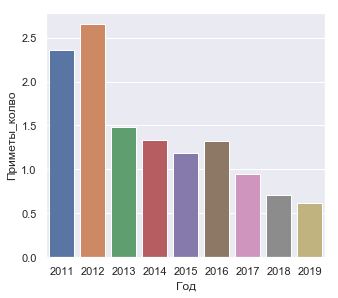

In [191]:
sns.set(rc={'figure.figsize':(5,4.5)})
#sns.set(rc={'figure.figsize':(8,7.5)})
sns.barplot(y = 'Приметы_колво', x = 'Год', data = df, ci = None)

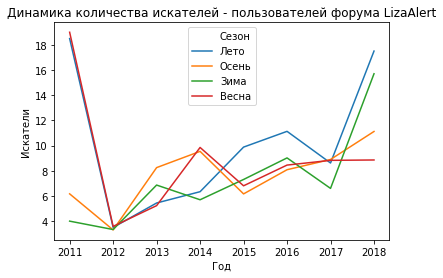

In [8]:
sns.lineplot(y = 'Искатели', x = 'Год', hue = 'Сезон', ci = None, data = df)
plt.title('Динамика количества искателей - пользователей форума LizaAlert')
plt.savefig('block1_foxes.png')

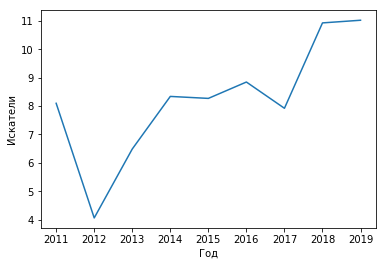

In [142]:
#sns.lineplot(y = 'Сила искателей', x = 'Год', ci = None, data = df, color = 'black')
#plt.twinx()
sns.lineplot(y = 'Искатели', x = 'Год', ci = None, data = df)

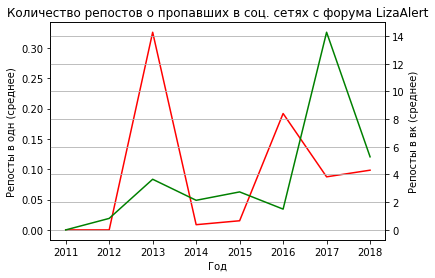

In [19]:
ax = plt.subplots()
sns.lineplot(y = 'Репосты в одн (среднее)', x = 'Год', data = df, color = 'red', ci = None)
plt.twinx()
sns.lineplot(y = 'Репосты в вк (среднее)', x = 'Год', ci = None, data = df, color = 'green')
plt.grid(b=None)
#plt.ylabel('Репосты вк. (среднее)')
#plt.ylabel('Репосты одн. (среднее)')
plt.title('Количество репостов о пропавших в соц. сетях с форума LizaAlert')
plt.savefig('block1_reposts.png')

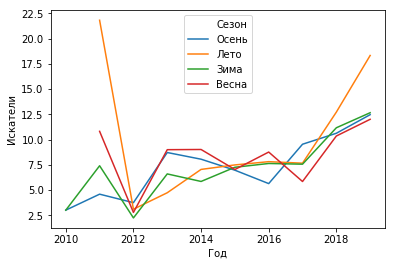

In [66]:
sns.lineplot(y = 'Искатели', x = 'Год', hue = 'Сезон', ci = None, data = df)

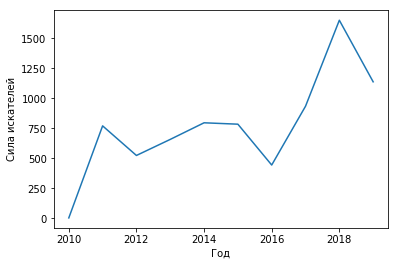

In [38]:
sns.lineplot(y = 'Сила искателей', x = 'Год', ci = None, data = df)

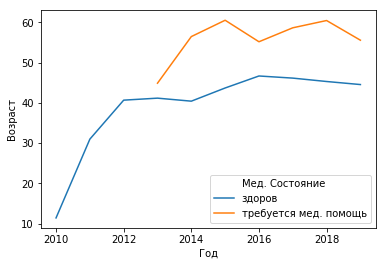

In [64]:
sns.lineplot(y = 'Возраст', x = 'Год', hue = 'Мед. Состояние', ci = None, data = df)

In [4]:
dfnew = df[df['Приметы_колво'] != 'Не указано']

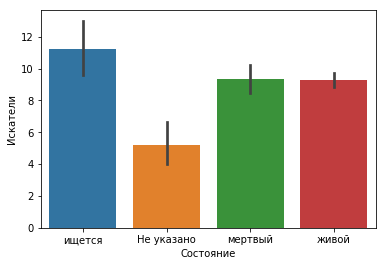

In [7]:
sns.barplot(x="Состояние", y="Искатели", data=df)

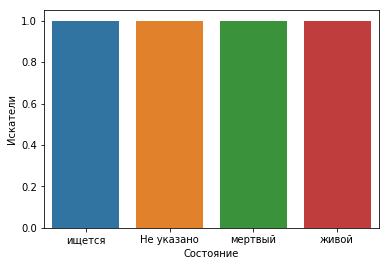

In [8]:
sns.barplot(x="Состояние", y="Искатели", data=df, estimator = median)

TypeError: '>' not supported between instances of 'list' and 'int'

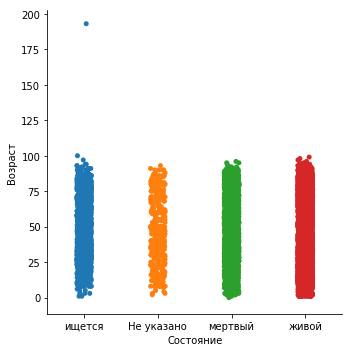

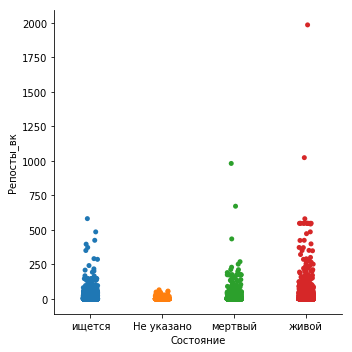

In [14]:
sns.catplot(x="Состояние", y="Возраст", data=df)
sns.catplot(x="Состояние", y="Репосты_вк", data=df)
df.groupby(["Состояние"])["Репосты_вк"].describe()
df.groupby(["Состояние"])["Сила искателей"].describe()
#df.groupby(["Состояние"])["Время поиска"].describe()
#df.groupby(["Состояние"])["Регион"].describe()

C:\Users\nikzo\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: unsupported operand type(s) for +: 'float' and 'str'

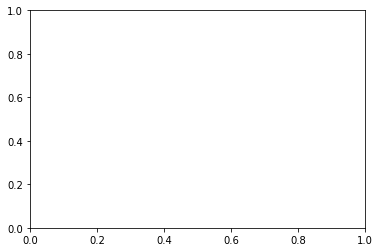

In [13]:
sns.distplot(df[df["Сила искателей"] != "0"])

In [67]:
df.groupby(["Год"])["Искатели"].describe()
df.groupby(["День недели"])["Искатели"].describe()
df.groupby(["Регион"])["Искатели"].describe()
df.groupby(["Локация"])["Искатели"].describe()
df.groupby(["Состояние"])["Сила искателей"].describe()
df.groupby(["Гендер"])["Искатели"].describe()
df.groupby(["Мед. Состояние"])["Искатели"].describe()

,count,mean,std,min,25%,50%,75%,max
Мед. Состояние,,,,,,,,
здоров,11733.0,9.007671,24.108060,0.0,1.0,1.0,7.0,754.0
требуется мед. помощь,1740.0,12.304023,23.282723,0.0,1.0,2.0,14.0,176.0


In [88]:
a = df[df['Регион'] == 'Урал']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.5509554140127388

In [19]:
df.groupby(["Состояние"])["Искатели"].describe() #в сложных условиях уже ничего не спасет: даже сила искателей!

,count,mean,std,min,25%,50%,75%,max
Состояние,,,,,,,,
Не указано,488.0,5.211066,15.455923,0.0,1.0,1.0,2.0,141.0
живой,8598.0,9.308676,21.128230,0.0,1.0,1.0,8.0,263.0
ищется,1899.0,11.225382,36.215922,0.0,1.0,1.0,6.0,754.0
мертвый,2488.0,9.324759,23.032569,0.0,1.0,1.0,8.0,337.0


In [56]:
df.groupby(["Состояние"])["Локация"].describe()

,count,unique,top,freq
Состояние,,,,
Не указано,488,3,Мужчина,223
живой,8598,3,Мужчина,4867
ищется,1899,3,Мужчина,1322
мертвый,2488,3,Мужчина,1715


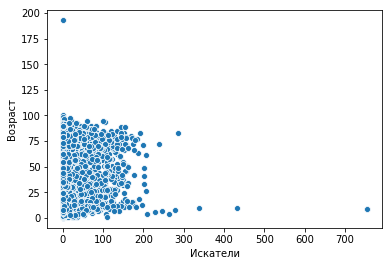

In [44]:
sns.scatterplot(x = 'Искатели', y = 'Возраст', data = df)

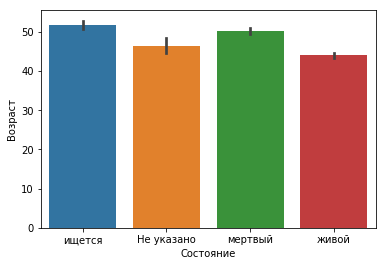

In [15]:
sns.barplot(x="Состояние", y="Возраст", data=df)

In [65]:
a = df[df['Мед. Состояние'] == 'требуется мед. помощь']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6695402298850575

In [66]:
a = df[df['Мед. Состояние'] == 'здоров']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6335123156907867

In [59]:
a = df[df['Сезон'] == 'Лето']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.625

In [60]:
a = df[df['Сезон'] == 'Весна']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6612734864300627

In [61]:
a = df[df['Сезон'] == 'Зима']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6521505376344086

In [146]:
a = df[df['Гендер'] == 'Мужчина']
print(len(a))
(len(a[a['Состояние'] == 'живой']))/len(a)

8127


0.5988679709609942

In [147]:
a = df[df['Гендер'] == 'Женщина']
print(len(a))
(len(a[a['Состояние'] == 'живой']))/len(a)

4581


0.711416721239904

In [9]:
a = df[df['Год'] == 2018]
(len(a[a['Состояние'] == 'живой']))/len(a)

0.623989218328841

In [11]:
a = df[df['Год'] == 2015]
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6940222897669707

In [19]:
a = df[df['Год'] == 2019]
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6732186732186732

In [57]:
a = df[df['Локация'] == 'город']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6466785744662754

In [58]:
a = df[df['Локация'] == 'деревня']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.5798368298368298

In [40]:
a = df[df['Год'] == 2018]
(len(a) - len(a[a['Состояние'] == 'ищется']))/len(a)

0.8699460916442049

In [41]:
a = df[df['Год'] == 2017]
(len(a) - len(a[a['Состояние'] == 'ищется']))/len(a)

0.8518518518518519

In [42]:
a = df[df['Год'] == 2016]
(len(a) - len(a[a['Состояние'] == 'ищется']))/len(a)

0.8404255319148937

In [43]:
a = df[df['Год'] == 2015]
(len(a) - len(a[a['Состояние'] == 'ищется']))/len(a)

0.8875379939209727

In [44]:
a = df[df['Год'] == 2014]
(len(a) - len(a[a['Состояние'] == 'ищется']))/len(a)

0.8727735368956743

In [46]:
a = df[df['Год'] == 2013]
(len(a) - len(a[a['Состояние'] == 'ищется']))/len(a)

0.8734353268428373

In [48]:
a = df[df['Год'] == 2019]
(len(a) - len(a[a['Состояние'] == 'ищется']))/len(a)

0.8471744471744471

In [48]:
a = dfnew[dfnew['Одежда_ярк'] == 'Темная']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6542593433197156

In [52]:
a = dfnew[dfnew['Телосложение'] == 'худ']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6251413068053358

In [54]:
a = dfnew[dfnew['Телосложение'] == 'круп']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6788732394366197

In [49]:
a = dfnew[dfnew['Одежда_ярк'] == 'Яркая']
(len(a[a['Состояние'] == 'живой']))/len(a)

0.7070175438596491

In [45]:
a = dfnew[dfnew['Одежда_колво'] == 0]
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6477541371158393

In [16]:
a = dfnew[dfnew['Приметы_колво'] == 4]
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6258671952428146

In [17]:
a = dfnew[dfnew['Приметы_колво'] == 2]
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6655922643029815

In [18]:
a = dfnew[dfnew['Приметы_колво'] == 0]
(len(a[a['Состояние'] == 'живой']))/len(a)

0.6506169852407452

In [3]:
df["Время поиска"].describe()

count    13473.000000
mean     248.604097  
std      2087.621546 
min     -670.000000  
25%      1.000000    
50%      3.000000    
75%      16.000000   
max      32186.000000
Name: Время поиска, dtype: float64

In [4]:
year_list = [ 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [5]:
month_list = ["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь","Ноябрь", "Декабрь"]

In [193]:
1 - df1.groupby(["Сезон"])["Состояние"].describe()["freq"] / df1.groupby(["Сезон"])["Состояние"].describe()["count"]

Сезон
Весна    0.368743
Зима     0.380508
Лето     0.429137
Осень    0.424908
dtype: object

In [212]:
df1[df1["Гендер"]!="Er"].groupby(["Локация","Состояние"])["Состояние"].count()

Локация  Состояние 
город    Не указано    226 
         живой         4315
         ищется        1225
         мертвый       1350
деревня  Не указано    4   
         живой         581 
         ищется        253 
         мертвый       282 
Name: Состояние, dtype: int64

# Блок 2

In [240]:
df2 = df1[df1["Время поиска"] < 100]
df22 = df2[df2["Время поиска"] > -1]
df22 = df22[df22["Искатели"] < 150]

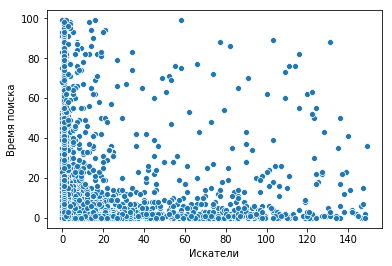

In [241]:
sns.scatterplot(x="Искатели", y="Время поиска", data=df22)

In [242]:
df22.groupby(["Состояние"])["Искатели"].mean()

Состояние
Не указано    4.909091
живой         8.629806
ищется        8.295840
мертвый       6.789512
Name: Искатели, dtype: float64

In [243]:
df22.groupby(["Искатели"])["Состояние"].describe()

,count,unique,top,freq
Искатели,,,,
0,519,4,ищется,260
1,4245,4,живой,2823
2,576,4,живой,378
3,346,4,живой,247
4,221,4,живой,105
5,167,4,живой,102
6,121,4,живой,54
7,128,4,живой,62
8,125,4,живой,77


In [244]:
kolya_chilit = df22.groupby(["Искатели"])["Состояние"].describe()["freq"] / df22.groupby(["Искатели"])["Состояние"].describe()["count"]

In [245]:
list(kolya_chilit.values)

[0.5009633911368016,
 0.665017667844523,
 0.65625,
 0.7138728323699421,
 0.4751131221719457,
 0.6107784431137725,
 0.4462809917355372,
 0.484375,
 0.616,
 0.6428571428571429,
 0.6666666666666666,
 0.6090909090909091,
 0.5333333333333333,
 0.5904761904761905,
 0.7096774193548387,
 0.6451612903225806,
 0.5285714285714286,
 0.75,
 0.7105263157894737,
 0.6410256410256411,
 0.391304347826087,
 0.5625,
 0.7619047619047619,
 0.8611111111111112,
 0.68,
 0.40625,
 0.45454545454545453,
 0.4444444444444444,
 0.5,
 0.6363636363636364,
 0.7272727272727273,
 0.6153846153846154,
 0.5,
 0.7058823529411765,
 0.5,
 0.7333333333333333,
 0.45454545454545453,
 0.7142857142857143,
 0.625,
 0.75,
 1.0,
 0.5333333333333333,
 0.75,
 1.0,
 0.42857142857142855,
 0.9,
 0.7692307692307693,
 0.6666666666666666,
 0.5,
 0.5,
 0.8,
 0.5,
 0.5,
 0.7,
 0.9090909090909091,
 0.6666666666666666,
 0.8,
 1.0,
 0.75,
 0.8333333333333334,
 0.75,
 0.6666666666666666,
 0.8333333333333334,
 1.0,
 0.6,
 0.6666666666666666,
 0.7142

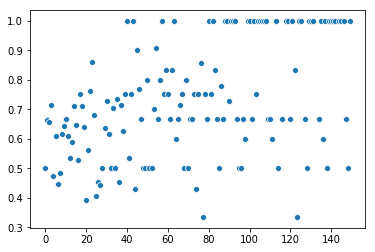

In [246]:
sns.scatterplot(y = list(kolya_chilit.values), x = list(kolya_chilit.index))

Искатели, пидорасы, твари, дома не сидят, но не работают


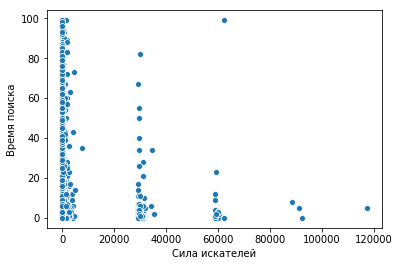

In [250]:
sns.scatterplot(x = "Сила искателей", y = "Время поиска", data=df22)

In [260]:
df_23 = df22[df22["Приметы_колво"]!= "Не указано"]

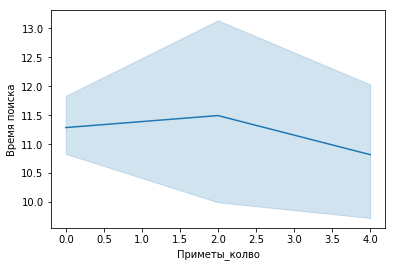

In [261]:
sns.lineplot(x = "Приметы_колво", y = "Время поиска", data=df_23)

Categorical plots

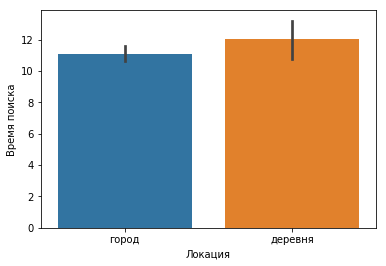

In [262]:
sns.barplot(y = "Время поиска", x = 'Локация', data=df_23)

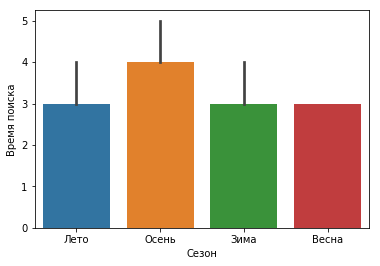

In [267]:
sns.barplot(y = "Время поиска", x = 'Сезон', data=df_23, estimator=median)

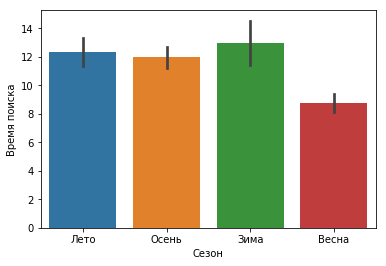

In [270]:
sns.barplot(y = "Время поиска", x = 'Сезон', data=df_23, estimator=mean)

In [277]:
loc_and_state = df_23[['Локация', "Состояние"]]

In [286]:
lns = loc_and_state[loc_and_state["Локация"] == "город"]

In [289]:
len(lns[lns["Состояние"] == "живой"])/len(lns)

0.6391184573002755

In [291]:
lms = loc_and_state[loc_and_state["Локация"] == "деревня"]

In [292]:
len(lms[lms["Состояние"] == "живой"])/len(lms)

0.5630585898709036

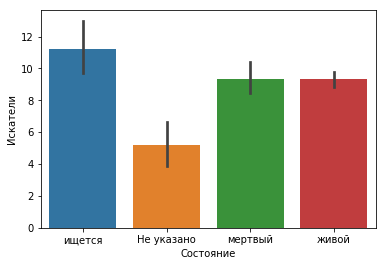

In [20]:
sns.barplot(x = "Состояние", y = "Искатели", data = df)

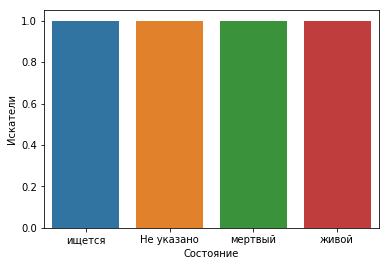

In [21]:
sns.barplot(x = "Состояние", y = "Искатели", data = df, estimator =)

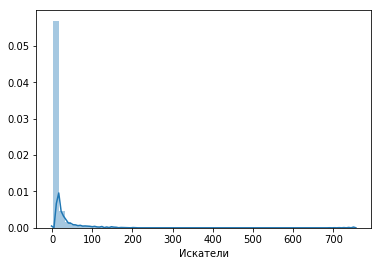

In [29]:
sns.distplot(df[df["Искатели"] > 0]["Искатели"])

In [31]:
s = df[df["Искатели"] > 0]["Искатели"]
s

0        4  
1        2  
3        2  
4        5  
5        4  
6        3  
7        2  
9        5  
10       5  
11       1  
12       4  
13       4  
14       2  
15       5  
16       3  
17       4  
18       45 
19       1  
20       3  
21       1  
22       1  
23       12 
24       1  
25       1  
26       3  
27       21 
28       3  
29       15 
30       5  
31       20 
33       18 
34       1  
35       1  
36       14 
37       1  
38       73 
39       4  
40       39 
41       55 
42       19 
43       3  
44       4  
45       148
48       4  
50       10 
51       1  
52       4  
53       8  
54       4  
55       1  
56       21 
57       1  
60       6  
61       1  
62       1  
64       24 
67       11 
69       101
70       1  
72       8  
73       55 
74       19 
76       8  
77       1  
78       1  
79       33 
80       1  
81       14 
82       1  
83       1  
84       1  
85       19 
86       15 
87       13 
88       1  
89       123
90       12 

In [35]:
np.percentile(np.array(s), 95)

46.0

In [36]:
s.mean()

9.867701863354037

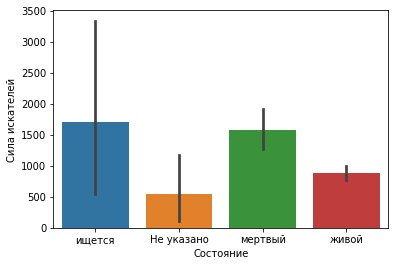

In [37]:
sns.barplot(x = "Состояние", y = "Сила искателей", data=df)

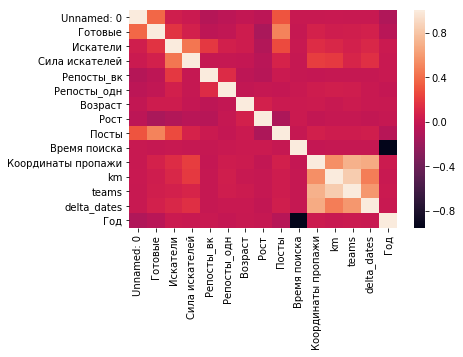

In [56]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [57]:
corr

,Unnamed: 0,Готовые,Искатели,Сила искателей,Репосты_вк,Репосты_одн,Возраст,Рост,Посты,Время поиска,Координаты пропажи,km,teams,delta_dates,Год
Unnamed: 0,1.000000,0.374910,0.048580,0.023565,-0.077083,-0.051514,-0.015434,-0.049296,0.300691,0.005531,0.004488,0.014718,0.004859,0.007954,-0.103212
Готовые,0.374910,1.000000,0.162209,0.065969,-0.041699,-0.027667,0.036465,-0.132120,0.492684,-0.001416,0.074709,0.046276,0.047806,0.069311,-0.060353
Искатели,0.048580,0.162209,1.000000,0.437838,0.185192,0.060891,0.032658,-0.091392,0.263406,0.003123,0.132496,0.104162,0.067231,0.103163,0.019831
Сила искателей,0.023565,0.065969,0.437838,1.000000,-0.005376,-0.001313,-0.009105,-0.063554,0.081414,-0.003848,0.207835,0.191620,0.085174,0.149700,0.009998
Репосты_вк,-0.077083,-0.041699,0.185192,-0.005376,1.000000,0.124336,-0.037698,-0.070464,0.017652,-0.000878,-0.007368,-0.003808,-0.004672,-0.005896,0.014788
Репосты_одн,-0.051514,-0.027667,0.060891,-0.001313,0.124336,1.000000,-0.020672,-0.006123,-0.011124,0.010297,0.032773,0.047308,0.041357,0.011773,-0.008193
Возраст,-0.015434,0.036465,0.032658,-0.009105,-0.037698,-0.020672,1.000000,0.067752,0.016807,0.017392,0.031082,0.004496,0.028378,0.014649,0.006800
Рост,-0.049296,-0.132120,-0.091392,-0.063554,-0.070464,-0.006123,0.067752,1.000000,-0.118928,0.020160,-0.016785,0.000146,-0.004759,-0.020762,-0.006221
Посты,0.300691,0.492684,0.263406,0.081414,0.017652,-0.011124,0.016807,-0.118928,1.000000,-0.001364,0.060419,0.034657,0.037599,0.049681,-0.069796
Время поиска,0.005531,-0.001416,0.003123,-0.003848,-0.000878,0.010297,0.017392,0.020160,-0.001364,1.000000,-0.007324,-0.003955,-0.005110,-0.004918,-0.952324
